 # Data Cleaning and Preprocessing

 #### 1. what is Data Cleaning

 Data cleaning is the process of preparing data for Analysis / ML / DL by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formated.
 ##### <u>Steps involved in data cleaning:</u>
 - Handling Missing Data
 - Outlier detection and Handling
 - Data Scaling and Transformation
 - Encoding Categorical Variables
 - Dealing with Inconsistant Data


#### 2. What is Missing Values ?
- Empty record or
- null value

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [25]:
loan_data = pd.read_csv('loan.csv')
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### <Span style = 'color : green '> To find data type of each column </span>

In [26]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### <u><Span style = 'color : skyblue '> To find shape or Dimensions of dataset:</span></u>

In [27]:
loan_data.shape

(614, 13)

- To find null value of each row

In [28]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- To find total null values in dataset

In [29]:
loan_data.isnull().sum().sum()

np.int64(149)

- Percentage of null values in each row of dataset

In [30]:
loan_data.isnull().sum()/loan_data.shape[0] * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

- Percentage of null values in whole dataset

In [31]:
loan_data.isnull().sum().sum()/ (loan_data.shape[0]*loan_data.shape[1]) * 100

np.float64(1.8667000751691305)

- To Find not null in dataset

In [32]:
loan_data.notnull().sum()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

- Graph to visualize null values

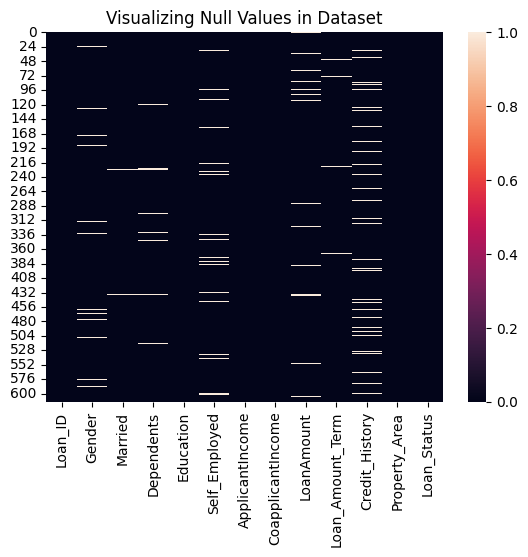

In [34]:
sns.heatmap(loan_data.isnull())
plt.title('Visualizing Null Values in Dataset')
plt.show()

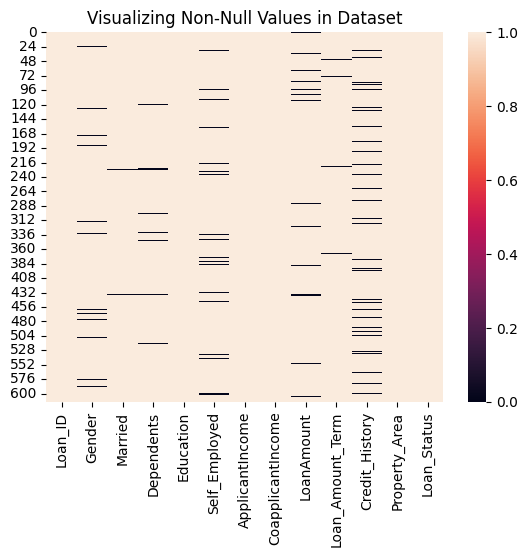

In [35]:
sns.heatmap(loan_data.notnull())
plt.title('Visualizing Non-Null Values in Dataset')
plt.show()

#### Handing missing values by removing column

In [37]:
loan_data.drop(columns = 'Credit_History', inplace = True)

In [39]:
loan_data.shape

(614, 12)

In [38]:
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y


#### Handing missing values by removing rows

In [40]:
loan_data.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,Urban,Y


#### Handling missing values (Imputing Category Data):

- fill missing value by loan_data.fillna(value).
- forward filling by loan_data.fillna(method = "ffill") -> current value in row will fill in next row cell. 
- forward filling by loan_data.fillna(method = "ffill", axis = 1) -> values in current column will fill in next column cell.
- backward filling by loan_data.fillna(method = "bfill") -> current value in row will fill in previous row cell
- backward filling by loan_data.fillna(method = "bfill", axis = 1) -> values in current column will fill in previous column cell.
- We can fill value by mode value in a particular column


##### To fill values in category data
- It is done by taking mode for every column and fill in empty value

In [42]:
for i in loan_data.select_dtypes(include = 'object').columns:
    loan_data[i].fillna(loan_data[i].mode()[0], inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20240\2158739879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data[i].fillna(loan_data[i].mode()[0], inplace = True)


In [43]:
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64